<a href="https://colab.research.google.com/github/mahwaik/tutorials/blob/master/BD_24_Summative1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETUP

You will need to upload `gen_data.py` for this to work. You'll also need to set up spark as in the spark notebooks.

In [ ]:
# Installing java and downloading spark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.6/spark-2.4.6-bin-hadoop2.7.tgz
!tar xf spark-2.4.6-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.6-bin-hadoop2.7"

# Summative

This exercise will go through a simulated streaming data workflow, as seen in the streaming data module. But it will be more complex, and closer to what a real world scenario might look like. You will need to 
- Investigate the incoming data
- Create an appropriate database to store the incoming records
- Write code to process records one by one as they arrive, including
 - Printing warnings when any reading goes above a predefined threshold
 - Storing the incoming data in a database
- Write code to analyse the stored data in a scalable manner
- Display relevant information in a dashboard

## Create an appropriate database

Each incoming record will look something like the following: 

{'Device_ID': 9,                  
  'Temp1': 33.01235436945101,  
  'Temp2': 46.313589806396116,  
  'Temp3': 16.506177184725505,  
  'Temp_Ambient': 23.782493817278034}
  
Each device is assigned an integer ID. Every device has multiple sensors, and reports the readings from each sensor as a float. Each call to gen_data.getReading() returns a time (an integer here to make things easier) and a record that follows the same pattern as above.

<b>Create a database to store the incoming data.</b> Include a time field for the time that the data arrives. If you create the database with python, show the code here, otherwise include any bash or sql code you run. You may wish to come back and add additional fields to make later analysis easier.

### ON COLAB: You can just show the appropriate SQL code, and then continue using an alternative (like a dataframe, saved to CSV) for the rest of the assignment.

In [ ]:
#CREATE DATABASE

In [ ]:
CREATE DATABASE TEMPERATURE_READINGS
CREATE TABLE Gen_data(
  Device_ID varchar(255),
  Temp1 int,
  Temp2 int,
  Temp3 int,
  Temp_Ambient int,
);

## Store and process the incoming data

As each record arrives (i.e. each loop of the for loop), you must
- <b>Store the record in the database you created above
- Use either moving windows or exponential averaging to keep track each sensor value for each device. Print out the values at the end of the loop
- Print a warning if any reported temperature exceeds 100 degrees for the first time for that device</b>

In [ ]:
import gen_data 
import pandas as pd

Errodata = []
window = [] #

# Your code here for any initializations you may need
data=[]
for i in range(1000): # Hint: make this lower for testing
    
    # The simulated data arriving - don't change this
    arrival_time, record = gen_data.getReading()
    
    # Your code here
arrival_time, record = gen_data.getReading()
window.append(record) 
if len(window)>10:
        del(window[0]) 
# Your code here
print(record)
# Print out whatever states you kept track of here (such as moving averages or latest readings )

{'Device_ID': 10, 'Temp1': 32.54629163254029, 'Temp2': 45.80092079579432, 'Temp3': 216.27314581627013, 'Temp_Ambient': 25.785838967288186}


In [ ]:

import pandas as pd
import numpy as np


data.append(record)
df=pd.DataFrame(data, columns=['Device_ID','Temp1','Temp2','Temp3','Temp_Ambient'])
df

,Device_ID,Temp1,Temp2,Temp3,Temp_Ambient
0,10,32.546292,45.800921,216.273146,25.785839


In [ ]:
df.iloc[:,2].rolling(window=5).mean()

0   NaN
Name: Temp2, dtype: float64

In [ ]:
#Warning if any reported temperature exceeds 100 degrees for the first time for that device

In [ ]:
Temp1_warning = np.argmax(df['Temp1'] > 100)
if Temp1_warning ==1:
        print('Warning, Temperature exceeds 100 degrees for the first time')
        print ('Device Temp 1 on index',Temp1_warning)
else:
          print('No device over 100 degress Temp 2 device')

No device over 100 degress Temp 2 device


In [ ]:
Temp2_warning = np.argmax(df['Temp2'] > 100)
if Temp1_warning ==1:
        print('Warning, Temperature exceeds 100 degrees for the first time for the device')
        print ('Device Temp 2 on index',Temp2_warning)
else:
          print('No device over 100 degress Temp 2 device')

No device over 100 degress Temp 2 device


In [ ]:
Temp3_warning = np.argmax(df['Temp3'] > 100)
if Temp1_warning ==1:
        print('Warning, Temperature exceeds 100 degrees for the first time for the device')
        print ('Device Temp 3 on index',Temp2_warning)
else:
          print('No device over 100 degress Temp 3 device')

No device over 100 degress Temp 3 device


In [ ]:
Temp_Ambient_warning = np.argmax(df['Temp_Ambient'] > 100)
if Temp_Ambient_warning ==1:
        print('Warning, Temperature exceeds 100 degrees for the first time for the device')
        print ('Temp_Ambient on index',Temp_Ambient_warning)
else:
          print('No device over 100 degress Temp_Ambient device')

No device over 100 degress Temp_Ambient device


## Analyzing the stored data

You now have a nice big database. <b>Load it into spark for analysis.</b>

You are told that during the time the data was being collected, devices 3 and 10 had malfunctioning sensors - their temperature3 readings are all 200+. <b>Verify this.</b> Since the engineers knew about the faulty sensors, no harm has been done, but seeing those false readings in the historical data makes you unhappy. You decide to go the extra mile and replace these readings with slightly more believable (but still false) data, to practise your new machine learning skills.

<b>Using the other devices for training, build a model to predict temperature3 given readings from the other sensors. Use the model to replace the erroneous values with the predicted ones. 
    
Do you think this is a reasonable step to take? Explain.</b> 

In [ ]:
from sklearn import linear_model # for linear regression modeling
from sklearn import preprocessing # for preprocessing like imputting missing values
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#divide dataset into predictor variables and outcome variable.

In [ ]:
X1 = df.drop(['Temp3','Device_ID'], axis = 1).values # X are the input (or independent) variables,drop pressure include other 5 inputs
y1 = df['Temp3'].values # Y is output (or dependent) variable array

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# create training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size=0.8,random_state=42)

In [ ]:
print(X1_train.shape, y1_train.shape)
print(X1_test.shape, y1_test.shape)

In [ ]:
lm = linear_model.LinearRegression()

model = lm.fit(X1_train,y1_train)

In [ ]:
print("Score:", model.score(X1_train, y1_train))

In [ ]:
#MAKE PREDICTIONS

In [ ]:
y_pred = lm.predict(X1_test)

In [ ]:
print(y_pred)

## Step 4: Visualization

Time to get creative. Your final task is to build up a set of visualizations that could let an engineer get a quick overview of the current status of the system. Include the current sensor readings for each device and any metrics you think would be important to display. Choose one device and show more detail - a downsampled graph showing the readings over time, perhaps.

You don't need to have your visualizations update in real time - merely show them as they would be presented at a given instant (i.e. feel free to use all the data you stored in the first section).

In [ ]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:208: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


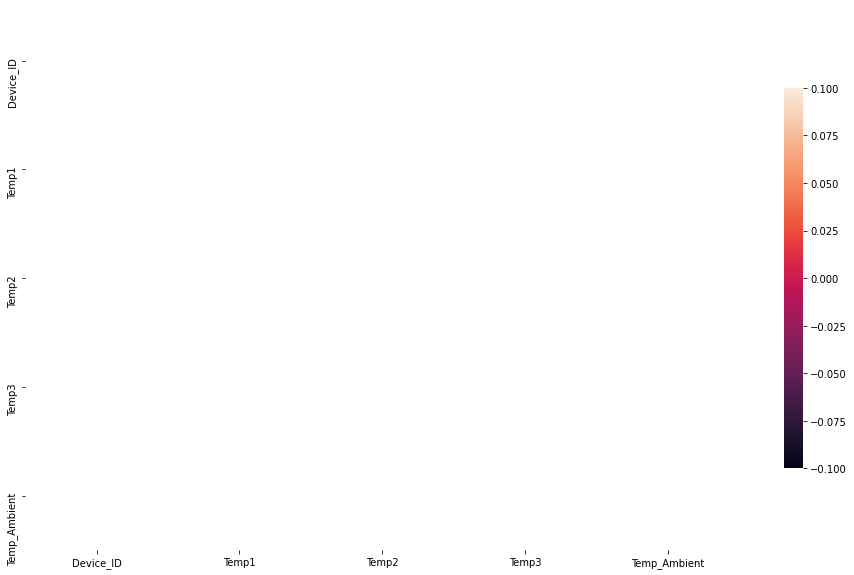

In [ ]:
corr = df.corr()
pyplot.figure(figsize=(16, 10))
sns.heatmap(corr, xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values,  
            linewidths=.08,                   # set linewidth between entries in matrix
           cbar_kws={"shrink": .7}) 

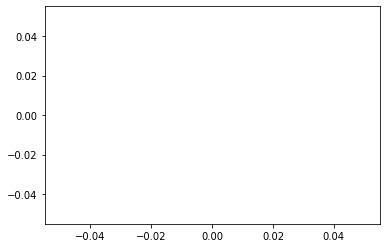

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:411: RuntimeWarning: invalid value encountered in double_scalars
  c0 = np.sum((data - mean) ** 2) / float(n)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:420: RuntimeWarning: divide by zero encountered in double_scalars
  ax.axhline(y=z99 / np.sqrt(n), linestyle="--", color="grey")
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:421: RuntimeWarning: divide by zero encountered in double_scalars
  ax.axhline(y=z95 / np.sqrt(n), color="grey")
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:423: RuntimeWarning: divide by zero encountered in doub

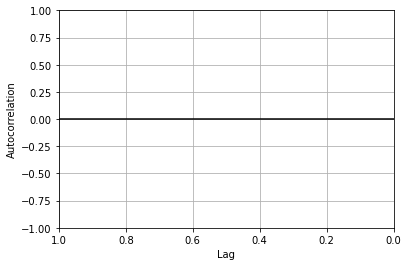

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:386: RuntimeWarning: Mean of empty slice.
  xo = x - x.mean()
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: ignored

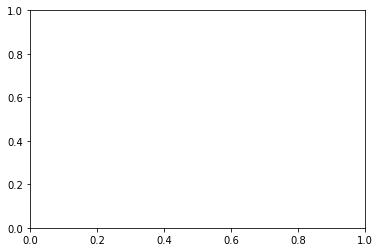

In [ ]:
Temp1 = df['Temp1']
Temp1[1:100].plot()
pyplot.show()

autocorrelation_plot(Temp1[1:100])
pyplot.show()

plot_acf(Temp1[1:100], lags=60)
pyplot.show()

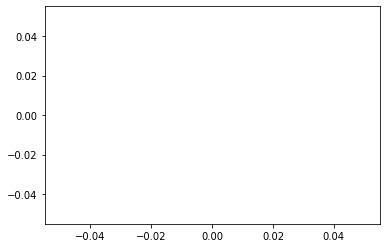

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:411: RuntimeWarning: invalid value encountered in double_scalars
  c0 = np.sum((data - mean) ** 2) / float(n)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:420: RuntimeWarning: divide by zero encountered in double_scalars
  ax.axhline(y=z99 / np.sqrt(n), linestyle="--", color="grey")
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:421: RuntimeWarning: divide by zero encountered in double_scalars
  ax.axhline(y=z95 / np.sqrt(n), color="grey")
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:423: RuntimeWarning: divide by zero encountered in doub

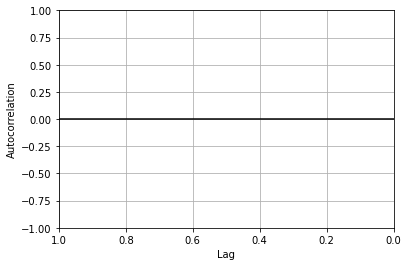

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:386: RuntimeWarning: Mean of empty slice.
  xo = x - x.mean()
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: ignored

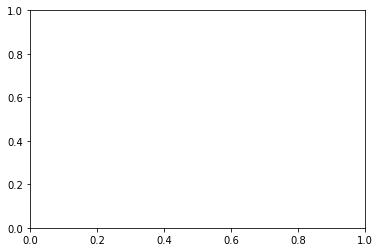

In [ ]:
Temp2 = df['Temp2']
Temp2[1:100].plot()
pyplot.show()

autocorrelation_plot(Temp2[1:100])
pyplot.show()

plot_acf(Temp2[1:100], lags=60)
pyplot.show()

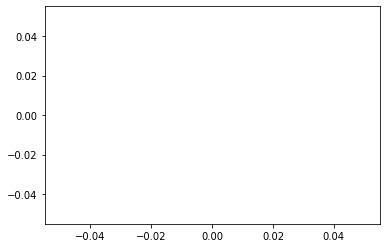

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:411: RuntimeWarning: invalid value encountered in double_scalars
  c0 = np.sum((data - mean) ** 2) / float(n)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:420: RuntimeWarning: divide by zero encountered in double_scalars
  ax.axhline(y=z99 / np.sqrt(n), linestyle="--", color="grey")
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:421: RuntimeWarning: divide by zero encountered in double_scalars
  ax.axhline(y=z95 / np.sqrt(n), color="grey")
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:423: RuntimeWarning: divide by zero encountered in doub

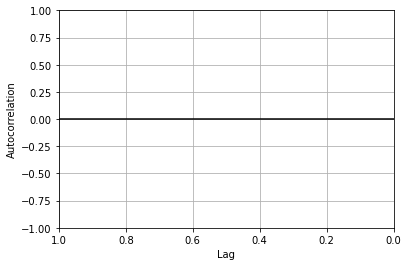

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:386: RuntimeWarning: Mean of empty slice.
  xo = x - x.mean()
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: ignored

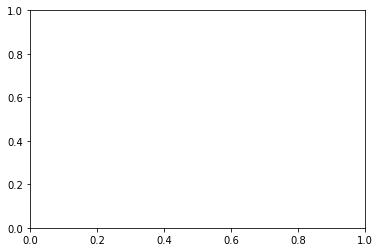

In [ ]:
Temp3 = df['Temp3']
Temp3[1:100].plot()
pyplot.show()

autocorrelation_plot(Temp3[1:100])
pyplot.show()

plot_acf(Temp3[1:100], lags=60)
pyplot.show()

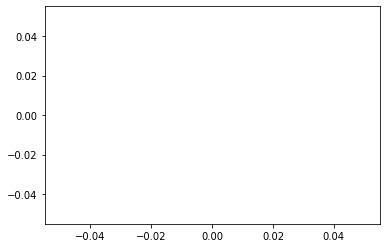

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:411: RuntimeWarning: invalid value encountered in double_scalars
  c0 = np.sum((data - mean) ** 2) / float(n)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:420: RuntimeWarning: divide by zero encountered in double_scalars
  ax.axhline(y=z99 / np.sqrt(n), linestyle="--", color="grey")
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:421: RuntimeWarning: divide by zero encountered in double_scalars
  ax.axhline(y=z95 / np.sqrt(n), color="grey")
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:423: RuntimeWarning: divide by zero encountered in doub

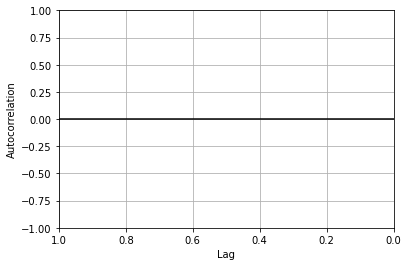

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:386: RuntimeWarning: Mean of empty slice.
  xo = x - x.mean()
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: ignored

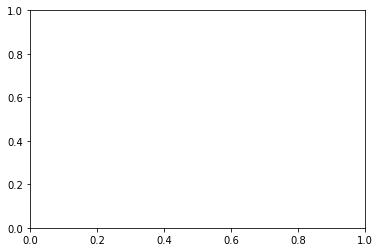

In [ ]:
Temp_Ambient = df['Temp_Ambient']
Temp_Ambient[1:10].plot()
pyplot.show()

autocorrelation_plot(Temp_Ambient[1:100])
pyplot.show()

plot_acf(Temp_Ambient[1:100], lags=60)
pyplot.show()